In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('weather_dataset.csv')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info() # None of the col has any Null value. Data is clean already

In [ ]:
# dropping duplicate, if any
df.drop_duplicates(subset = 'Date/Time', inplace = True)
df.reset_index(inplace = True)

In [ ]:
df.index = df['Date/Time']
df = df.drop(['Date/Time', 'index'], axis = 1)
df.head()

# Basic Queries

### Q1. Find all the unique 'Wind Speed' values in the data

In [ ]:
df['Wind Speed_km/h'].unique()

### Q2. Find the number of times when the 'Weather is exactly Clear'

In [ ]:
clear_weather = df.loc[df.Weather == "Clear"]
clear_weather

In [ ]:
## Method 1
clear_weather.count()

In [ ]:
clear_weather.count()[0]

#### FINAL ANSWER

In [ ]:
## Method 2

print("Number of times when the 'Weather is exactly Clear':",clear_weather.shape[0])

### Q3. Find the number of times when the 'Wind Speed was exactly 4 km/h'

In [ ]:
df.head()

In [ ]:
wind_speed_4 = df[df['Wind Speed_km/h']==4]
wind_speed_4

#### FINAL ANSWER

In [ ]:
print("Number of times when the 'Wind Speed was exactly 4 km/h: ", wind_speed_4.shape[0])

### Q4. Find all instances when 'Snow' was recorded

In [ ]:
df.Weather.unique()

In [ ]:
def weather_has_snow(string):
    presence = string.lower().find('snow')
    return True if presence == 0 else False

In [ ]:
df['Snow_Status'] = df['Weather'].apply(weather_has_snow)

In [ ]:
df.head()

In [ ]:
snow_data = df.loc[df.Snow_Status == True]
snow_data

In [ ]:
df.drop('Snow_Status', inplace = True, axis =1)
snow_data.drop('Snow_Status', inplace = True, axis = 1)

#### FINAL ANSWER

In [ ]:
snow_data

### Q5. Find all instances when 'Wind Speed is above 24' and 'Visibility is 25'

In [ ]:
df.head()

Final Answer

#### FINAL ANSWER

In [ ]:
df[(df['Wind Speed_km/h'] > 24) & (df['Visibility_km'] == 25)]

### Q6.  What is the Mean value of Temp for each 'Weather Conditon'

In [ ]:
df.head()

In [ ]:
df.groupby('Weather').mean()

#### FINAL ANSWER

In [ ]:
weather_condition_wise_mean_TEMP = df.groupby('Weather').mean()[['Temp_C']]

In [ ]:
weather_condition_wise_mean_TEMP.head()

### Q7.  What is the Max Humidity and Min Visibility for each 'Weather Conditon'

In [ ]:
df.head()

In [ ]:
weather_condition_wise_Max_HUMIDITY = df.groupby('Weather').max()[['Rel Hum_%']]
weather_condition_wise_Min_VISIBILITY = df.groupby('Weather').min()[['Visibility_km']]

#### FINAL ANSWER

In [ ]:
weather_condition_wise_Max_HUMIDITY.head()

In [ ]:
weather_condition_wise_Min_VISIBILITY.head()

### Q8. Find all instances when 'Weather is Clear' or 'Visibility is above 40'

In [ ]:
df.head()

#### FINAL ANSWER

In [ ]:
df[(df['Weather']=='Clear') | (df['Visibility_km'] > 40#### FINAL ANSWER)]

### Q9. Find all instances when : A. 'Weather is Clear' and 'Relative Humidity is greater than 50' or B. 'Visibility is above 40'


In [ ]:
df.head(2)

#### FINAL ANSWER

In [ ]:
df[(df['Weather'] == 'Clear') & (df['Rel Hum_%'] > 50) | (df['Visibility_km'] > 40)]

# Graphical Visualisations

df.head()

In [ ]:
type(df.index[0])

In [ ]:
df.index.to_numpy()[0].split()[0]

In [ ]:
def remove_time(date):
    return date.split()[0]

In [ ]:
df['Date_time'] = df.index

In [ ]:
df['Date'] = df['Date_time'].apply(remove_time)

In [ ]:
df= df.drop('Date_time', axis = 1)

In [237]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Date
Date/Time,,,,,,,,
1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1/1/2012
1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1/1/2012
1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1/1/2012
1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1/1/2012
1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1/1/2012


In [242]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [259]:
mean_temp_daily = df.groupby('Date')['Temp_C'].mean()
mean_temp_daily

Date
1/1/2012      0.629167
1/10/2012    -1.112500
1/11/2012   -12.358333
1/12/2012    -6.541667
1/13/2012    -4.600000
               ...    
9/5/2012     22.645833
9/6/2012     23.241667
9/7/2012     21.312500
9/8/2012     21.162500
9/9/2012     14.695833
Name: Temp_C, Length: 366, dtype: float64

In [258]:
max_temp_daily = df.groupby('Date')['Temp_C'].max()
max_temp_daily

Date
1/1/2012      5.3
1/10/2012     2.6
1/11/2012    -9.5
1/12/2012    -4.1
1/13/2012    -1.7
             ... 
9/5/2012     27.0
9/6/2012     28.2
9/7/2012     25.6
9/8/2012     26.5
9/9/2012     18.1
Name: Temp_C, Length: 366, dtype: float64

In [257]:
min_temp_daily = df.groupby('Date')['Temp_C'].min()
min_temp_daily

Date
1/1/2012     -1.8
1/10/2012    -8.6
1/11/2012   -14.7
1/12/2012   -10.0
1/13/2012    -7.6
             ... 
9/5/2012     17.6
9/6/2012     19.5
9/7/2012     15.8
9/8/2012     14.2
9/9/2012     11.0
Name: Temp_C, Length: 366, dtype: float64

In [263]:
temp_data = {'Mean Temp': mean_temp_daily, 
            'Max Temp': max_temp_daily, 
            'Min Temp': min_temp_daily}
indices = mean_temp_daily.index
daily_temp_data = pd.DataFrame(temp_data, index = indices)

In [264]:
daily_temp_data

,Mean Temp,Max Temp,Min Temp
Date,,,
1/1/2012,0.629167,5.3,-1.8
1/10/2012,-1.112500,2.6,-8.6
1/11/2012,-12.358333,-9.5,-14.7
1/12/2012,-6.541667,-4.1,-10.0
1/13/2012,-4.600000,-1.7,-7.6
...,...,...,...
9/5/2012,22.645833,27.0,17.6
9/6/2012,23.241667,28.2,19.5
9/7/2012,21.312500,25.6,15.8


#### Variation of Mean Temp with Time

Text(0.5, 1.0, 'Mean Temprature Thoughout a Day')

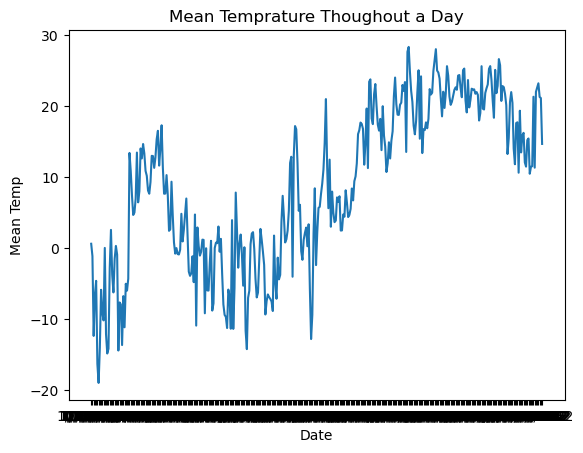

In [280]:
sns.lineplot(data = daily_temp_data, x = daily_temp_data.index, y = 'Mean Temp')
plt.title('Mean Temprature Thoughout a Day')

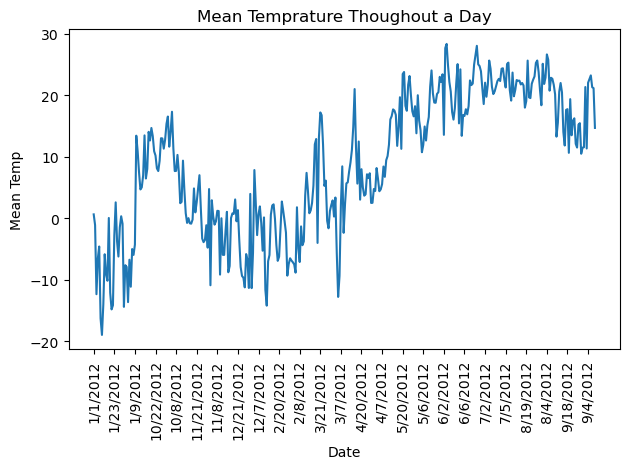

In [300]:
sns.lineplot(data = daily_temp_data, x = daily_temp_data.index, y = 'Mean Temp')
plt.title('Mean Temprature Thoughout a Day')
selected_date_for_X_axis = daily_temp_data.index[::15]
plt.xticks(selected_date_for_X_axis, rotation = 90)
plt.tight_layout() # to fit in the whole graph in saved pic
plt.savefig('Mean Temp Daily.jpg')

#### Saving temp Data to a File

In [289]:
daily_temp_data.to_csv('Daily Temprature Data.csv', index = False)

In [295]:
df.drop('Date', inplace = True, axis = 1)

In [296]:
df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
Date/Time,,,,,,,
1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


#### Get the Temprature, Humidity and Visibility in a particular weather condition

In [307]:
weather_specific_mean_data = df.groupby("Weather").mean()
weather_specific_mean_data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000


([<matplotlib.axis.XTick at 0x7f027ea49910>,
 [Text(0.0, 0, 'Clear'),
  Text(1.0, 0, 'Cloudy'),
  Text(2.0, 0, 'Drizzle'),
  Text(3.0, 0, 'Drizzle,Fog'),
  Text(4.0, 0, 'Drizzle,Ice Pellets,Fog'),
  Text(5.0, 0, 'Drizzle,Snow'),
  Text(6.0, 0, 'Drizzle,Snow,Fog'),
  Text(7.0, 0, 'Fog'),
  Text(8.0, 0, 'Freezing Drizzle'),
  Text(9.0, 0, 'Freezing Drizzle,Fog'),
  Text(10.0, 0, 'Freezing Drizzle,Haze'),
  Text(11.0, 0, 'Freezing Drizzle,Snow'),
  Text(12.0, 0, 'Freezing Fog'),
  Text(13.0, 0, 'Freezing Rain'),
  Text(14.0, 0, 'Freezing Rain,Fog'),
  Text(15.0, 0, 'Freezing Rain,Haze'),
  Text(16.0, 0, 'Freezing Rain,Ice Pellets,Fog'),
  Text(17.0, 0, 'Freezing Rain,Snow Grains'),
  Text(18.0, 0, 'Haze'),
  Text(19.0, 0, 'Mainly Clear'),
  Text(20.0, 0, 'Moderate Rain,Fog'),
  Text(21.0, 0, 'Moderate Snow'),
  Text(22.0, 0, 'Moderate Snow,Blowing Snow'),
  Text(23.0, 0, 'Mostly Cloudy'),
  Text(24.0, 0, 'Rain'),
  Text(25.0, 0, 'Rain Showers'),
  Text(26.0, 0, 'Rain Showers,Fog'),
  Text

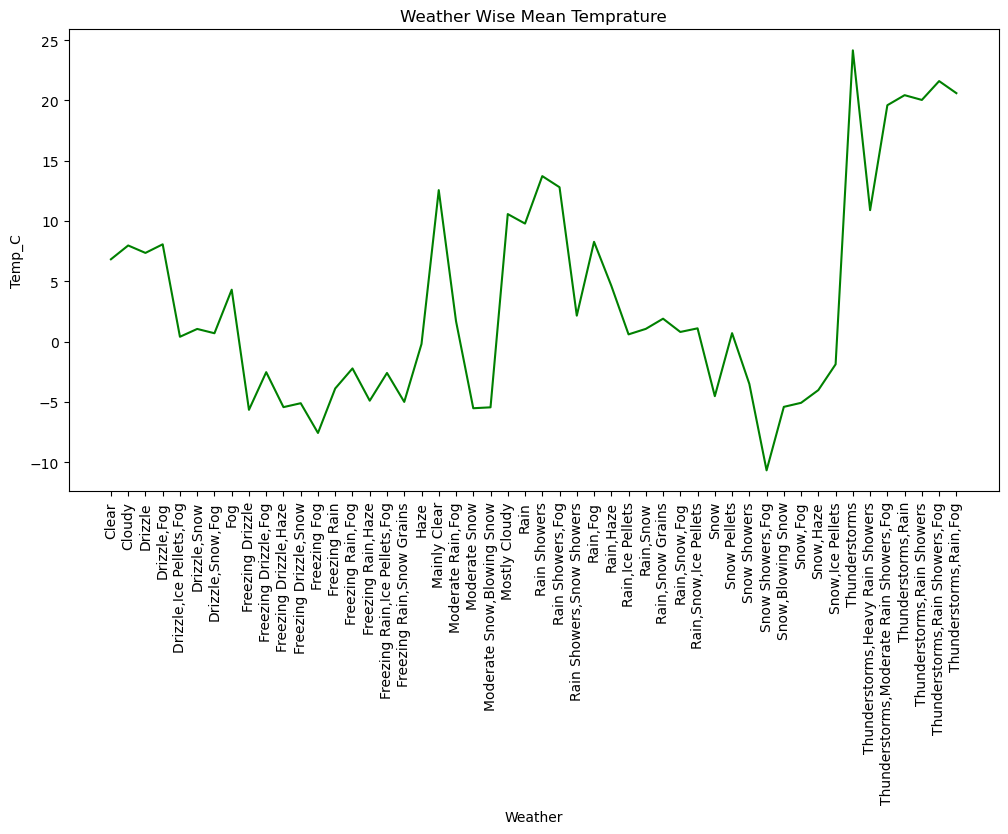

In [324]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = weather_specific_mean_data, x = weather_specific_mean_data.index, y = 'Temp_C', color = 'green')
plt.title('Weather Wise Mean Temprature')
selected_date_for_X_axis = weather_specific_mean_data.index[::]
plt.xticks(selected_date_for_X_axis, rotation = 90)
# plt.savefig('Weather Wise Mean Temprature.png')

#### Save the dataset with temp, visibility and humidity corresponding to each of the condion

In [321]:
weather_specific_mean_data.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000


In [323]:
weather_specific_mean_data.to_csv('Condition Based Data.csv', columns=['Temp_C', 'Rel Hum_%', 'Visibility_km'])